In [1]:
#auto-mpg.csv 파일을 load
#horsepower의 데이터 타입을 float형으로 형변환
#형변환 할 수 없는 자료의 행을 제거
#origin 1, 2, 3 -> 각 usa eu jpn으로 변경, category 형변환

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./dataset/auto-mpg.csv', header=None)

df.columns=['mpg','cylinders', 'displacement','horsepower','weight','acceleration',
           'model year', 'origin','name']

In [7]:
print(df.horsepower.dtype)
df['horsepower'].replace('?',np.nan, inplace = True)
df.dropna(subset=['horsepower'], axis=0, inplace =True)
df['horsepower'] = df['horsepower'].astype('float')
print(df.horsepower.dtype)
df['origin'].replace({1:'USA',2:'EU',3:'JPN'},inplace=True)
df['origin'] = df['origin'].astype('category')
print(df.origin.dtype)

float64
float64
category


In [16]:
#np.histogram() 함수를 활용하면 각 구간의 경계선을 구할 수 있음
count, bin_dividers = np.histogram(df['horsepower'],bins=3) 
#count는 각 구간의 데이터 갯수를 반환
print(count, bin_dividers)

#pd.cut() 함수로 각각 데이터를 3개의 빈에 할당
bin_names = ['저출력','보통출력','고출력']

df['hp_bin']=pd.cut(x=df['horsepower'], # 데이터 배열
                   bins=bin_dividers, #경계값리스트
                   labels=bin_names, # bin 이름
                   include_lowest=True) #첫 경계값포함
print(df[['horsepower','hp_bin']].head(15))
print(df.hp_bin.dtype)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력
category


In [18]:
hp_dummies = pd.get_dummies(df['hp_bin'])
hp_dummies.head(15) # 0 or 1 one-hot encoding

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [24]:
#머신러닝 분석을 위한 라이브러리 sklearn -> 딥러닝 tensorflow의 keras
from sklearn import preprocessing
#전처리를 위한 encoder
label_encoder = preprocessing.LabelEncoder() # 클래스instance생성 labelencoder
onehot_encoder = preprocessing.OneHotEncoder() # onehot encoder생성

#label encoder로 문자형 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)

#2차워 배열로 변경
onehot_reshape = onehot_labeled.reshape(len(onehot_labeled),1)
# 2차원 배열로 변환
print(onehot_reshape)
#희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshape)
print(onehot_fitted)

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


In [30]:
# 정규화 : 모든 실수를 0~1또는 -1~1사이의 수로 변환 상대숫자간 영향의 균형을
#위해
#.describe() 통계data
# 해당 열의 최대값으로 모든 데이터를 나누어 저장하는 방법 abs는 절대값
df['h_1']= df.horsepower / abs(df.horsepower.max())
df[['horsepower','h_1']]
# 해당 열의 (최대값-최소값)으로 모든 데이터를 나누어 저장
df['h_1']= df.horsepower / abs(df.horsepower.max() - df.horsepower.min())
df[['horsepower','h_1']]

,horsepower,h_1
0,130.0,0.706522
1,165.0,0.896739
2,150.0,0.815217
3,150.0,0.815217
4,140.0,0.760870
...,...,...
393,86.0,0.467391
394,52.0,0.282609
395,84.0,0.456522
396,79.0,0.429348


In [60]:
# 시계열 데이터
df = pd.read_csv('./dataset/stock-data.csv') #header= 0 안하면 첫열이 컬럼명
df.info()

#Date 컬럼의 자료를 new_Date 로 datetime형식으로

df['new_Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(

<AxesSubplot:xlabel='new_Date'>

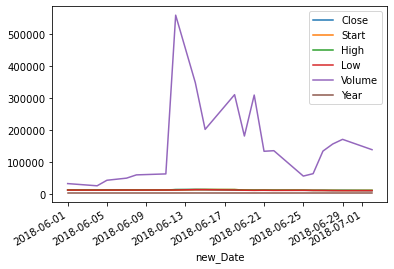

In [62]:
#new_Date 컬럼을 인덱스로 설정
#Date 컬럼을 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date',axis=1, inplace=True)
df.head()

df.plot()

In [63]:
dates = ['2019-01-01','2020-03-01','2021-06-01']

#str을 timestamp로 변환 : datetime
ts_dates = pd.to_datetime(dates)
type(ts_dates[0])

ts_day = ts_dates.to_period(freq='M') # day 반환 freq='D'날짜, 'M' 월, 'A'연도
ts_day

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')

In [73]:
#날자를 분리
df = pd.read_csv('./dataset/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
#데이터가 datetime 형식일 때 : dt.year,dt.month,dt.day를 쓸 수 있다.
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.head()

#종가, 시작가, 연, 월, 일, new_Date만 추출 -> 
#df_stock에 저장, new_date를 인덱스로 설정
df_stock=df.loc[:,['Close', 'Start', 'Year', 'Month', 'Day', 'new_Date']]
df_stock.set_index('new_Date', inplace=True)
df_stock
#new_Date를 인덱스로

,Close,Start,Year,Month,Day
new_Date,,,,,
2018-07-02,10100,10850,2018,7,2
2018-06-29,10700,10550,2018,6,29
2018-06-28,10400,10900,2018,6,28
2018-06-27,10900,10800,2018,6,27
2018-06-26,10800,10900,2018,6,26
2018-06-25,11150,11400,2018,6,25
2018-06-22,11300,11250,2018,6,22
2018-06-21,11200,11350,2018,6,21
2018-06-20,11550,11200,2018,6,20


In [91]:
# %load hangul.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False



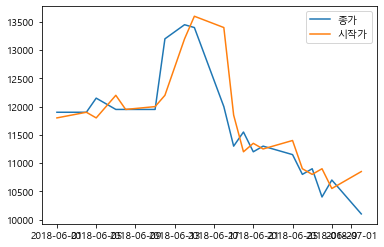

In [93]:
fig=plt.figure()

ax =fig.add_subplot(1,1,1)
ax.plot(df_stock.index,df_stock['Close'],label='종가')
ax.plot(df_stock.index,df_stock['Start'],label='시작가')
ax.legend(loc='best')
# ax.set_xticklabels(df_stock.index,rotation=90)

plt.show()